In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


In [2]:
df = pd.read_pickle("data/flickr_data_cleaned.pkl")
df.head(5)

,id,user,lat,long,tags,title,date_upload,date_taken,url
0,4395181099,30624617@N03,45.754858,4.821710,"[chair, lyon, rhône, chaise, rhônealpes]",Chaises avec vue,2010-02-28 20:23:00,2010-02-28 15:11:00,https://www.flickr.com/photos/30624617@N03/439...
1,4394748717,35853470@N00,45.753270,4.862953,[],,2010-02-28 17:52:00,2010-02-28 17:51:00,https://www.flickr.com/photos/35853470@N00/439...
2,4394694699,11817998@N05,45.760655,4.846564,"[365, iphone]",59/365 - R46 V103 B163,2010-02-28 17:33:00,2010-02-28 17:29:00,https://www.flickr.com/photos/11817998@N05/439...
3,4394803790,11545749@N06,45.784000,4.874072,"[nin, nineinchnails, gift, screening, toiou, a...",2010-01-29 Toiou Avott Lyon,2010-02-28 12:38:00,2010-01-28 20:15:00,https://www.flickr.com/photos/11545749@N06/439...
4,4394803554,11545749@N06,45.784000,4.874072,"[lyon, nin, nineinchnails, gift, screening, to...",2010-01-28 Toiou Avott Lyon,2010-02-28 12:38:00,2010-01-28 20:10:00,https://www.flickr.com/photos/11545749@N06/439...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185209 entries, 0 to 420239
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           185209 non-null  int64         
 1   user         185209 non-null  object        
 2   lat          185209 non-null  float64       
 3   long         185209 non-null  float64       
 4   tags         185209 non-null  object        
 5   title        185209 non-null  object        
 6   date_upload  185209 non-null  datetime64[ns]
 7   date_taken   185209 non-null  datetime64[ns]
 8   url          185209 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 14.1+ MB


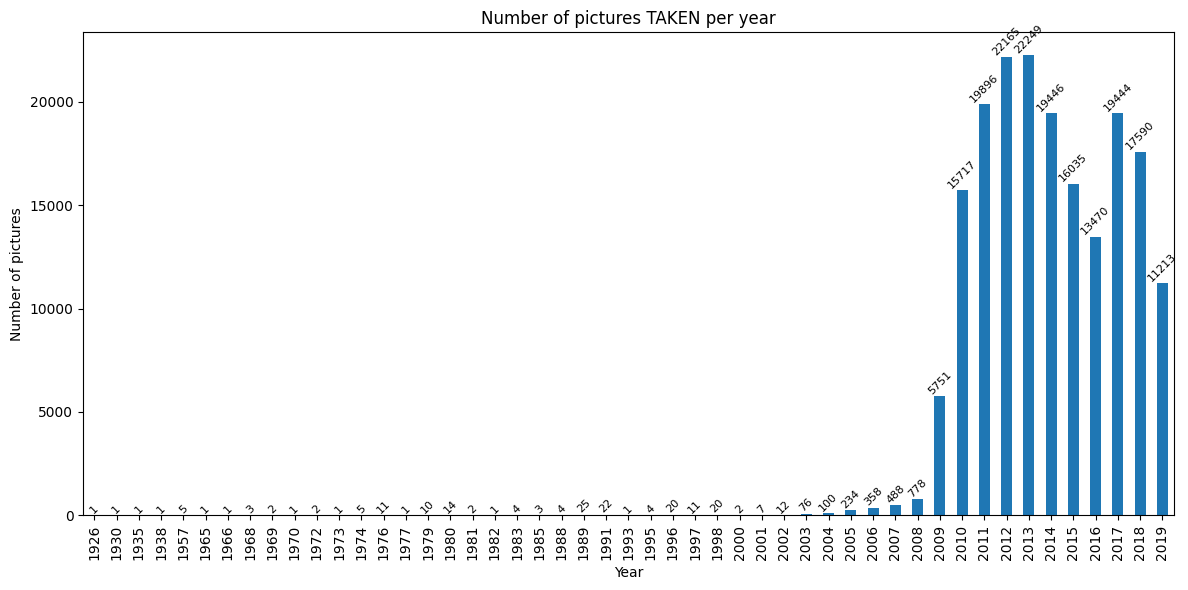

In [4]:
ax = df["date_taken"].dt.year.value_counts().sort_index().plot(kind="bar", figsize=(12, 6))
plt.title("Number of pictures TAKEN per year")
plt.xlabel("Year")
plt.ylabel("Number of pictures")

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fontsize=8, rotation=45)

plt.tight_layout()
plt.show()

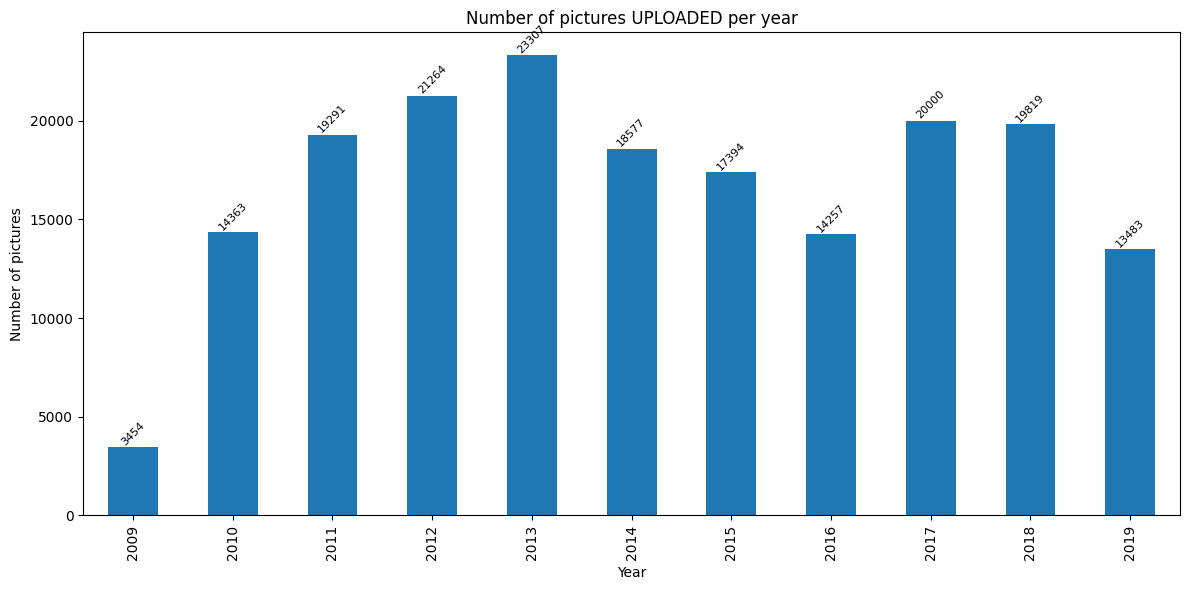

In [5]:
ax = df["date_upload"].dt.year.value_counts().sort_index().plot(kind="bar", figsize=(12, 6))
plt.title("Number of pictures UPLOADED per year")
plt.xlabel("Year")
plt.ylabel("Number of pictures")

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fontsize=8, rotation=45)

plt.tight_layout()
plt.show()

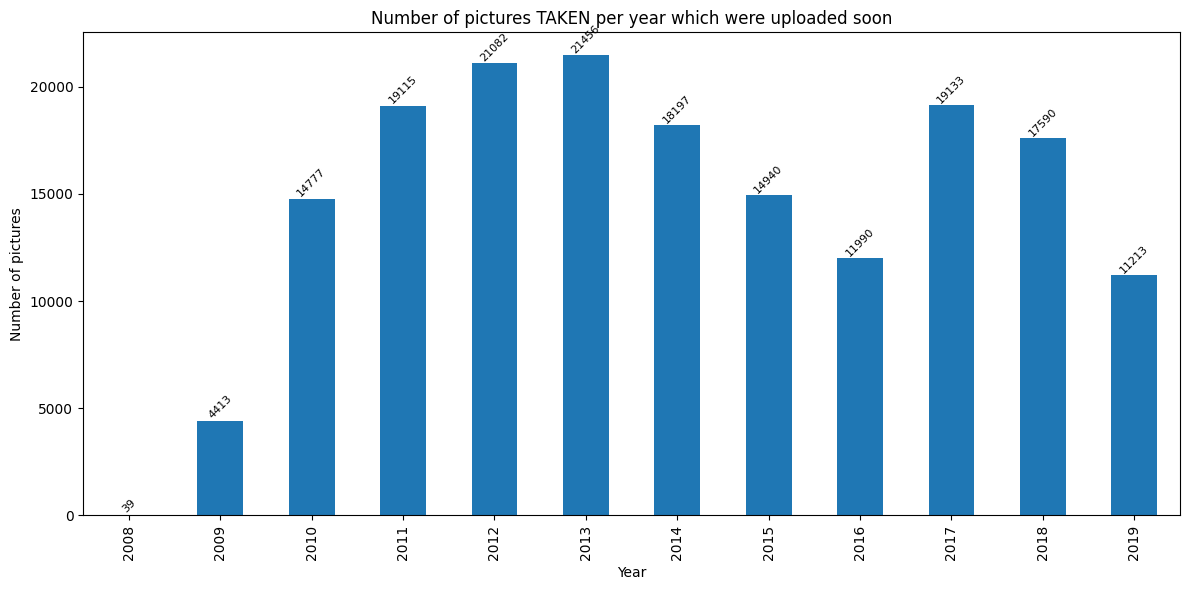

In [6]:
# distribution of pictures with the small difference between date_taken and date_upload
similar_mask = df["date_upload"].dt.year - df["date_taken"].dt.year <= 1
similar_year = df[similar_mask]
ax = similar_year["date_taken"].dt.year.value_counts().sort_index().plot(kind="bar", figsize=(12, 6))
plt.title("Number of pictures TAKEN per year which were uploaded soon")
plt.xlabel("Year")
plt.ylabel("Number of pictures")

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fontsize=8, rotation=45)

plt.tight_layout()
plt.show()

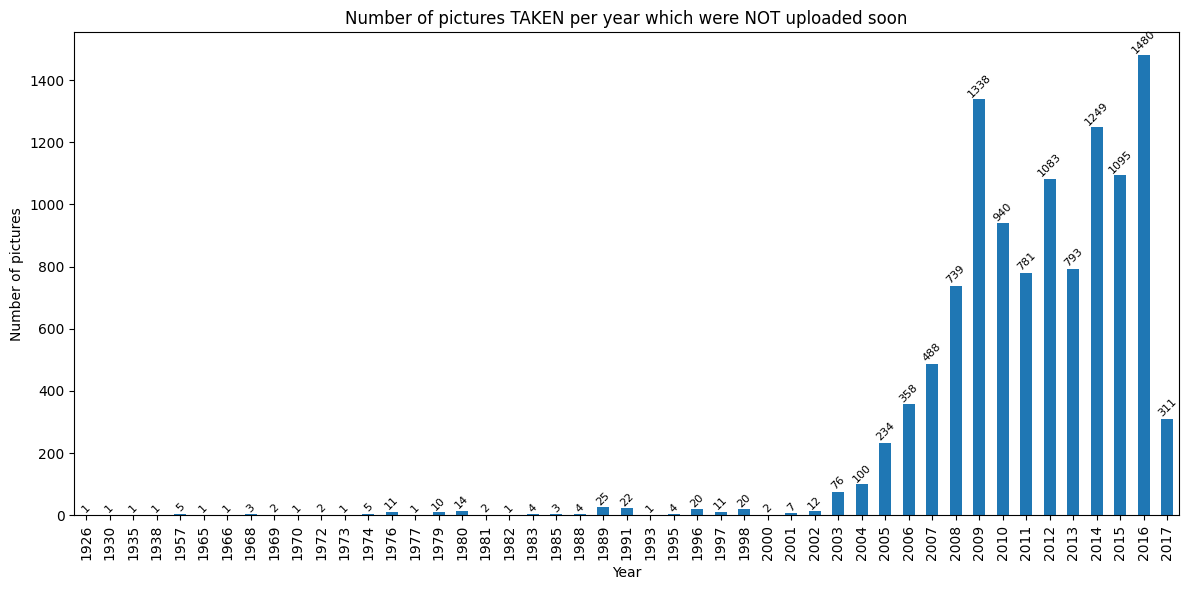

In [7]:
diff_year = df[~similar_mask]
ax = diff_year["date_taken"].dt.year.value_counts().sort_index().plot(kind="bar", figsize=(12, 6))
plt.title("Number of pictures TAKEN per year which were NOT uploaded soon")
plt.xlabel("Year")
plt.ylabel("Number of pictures")

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fontsize=8, rotation=45)

plt.tight_layout()
plt.show()

In [8]:
df['similar_year'] = similar_mask

Total unique tags: 44568
Total tags: 2073924



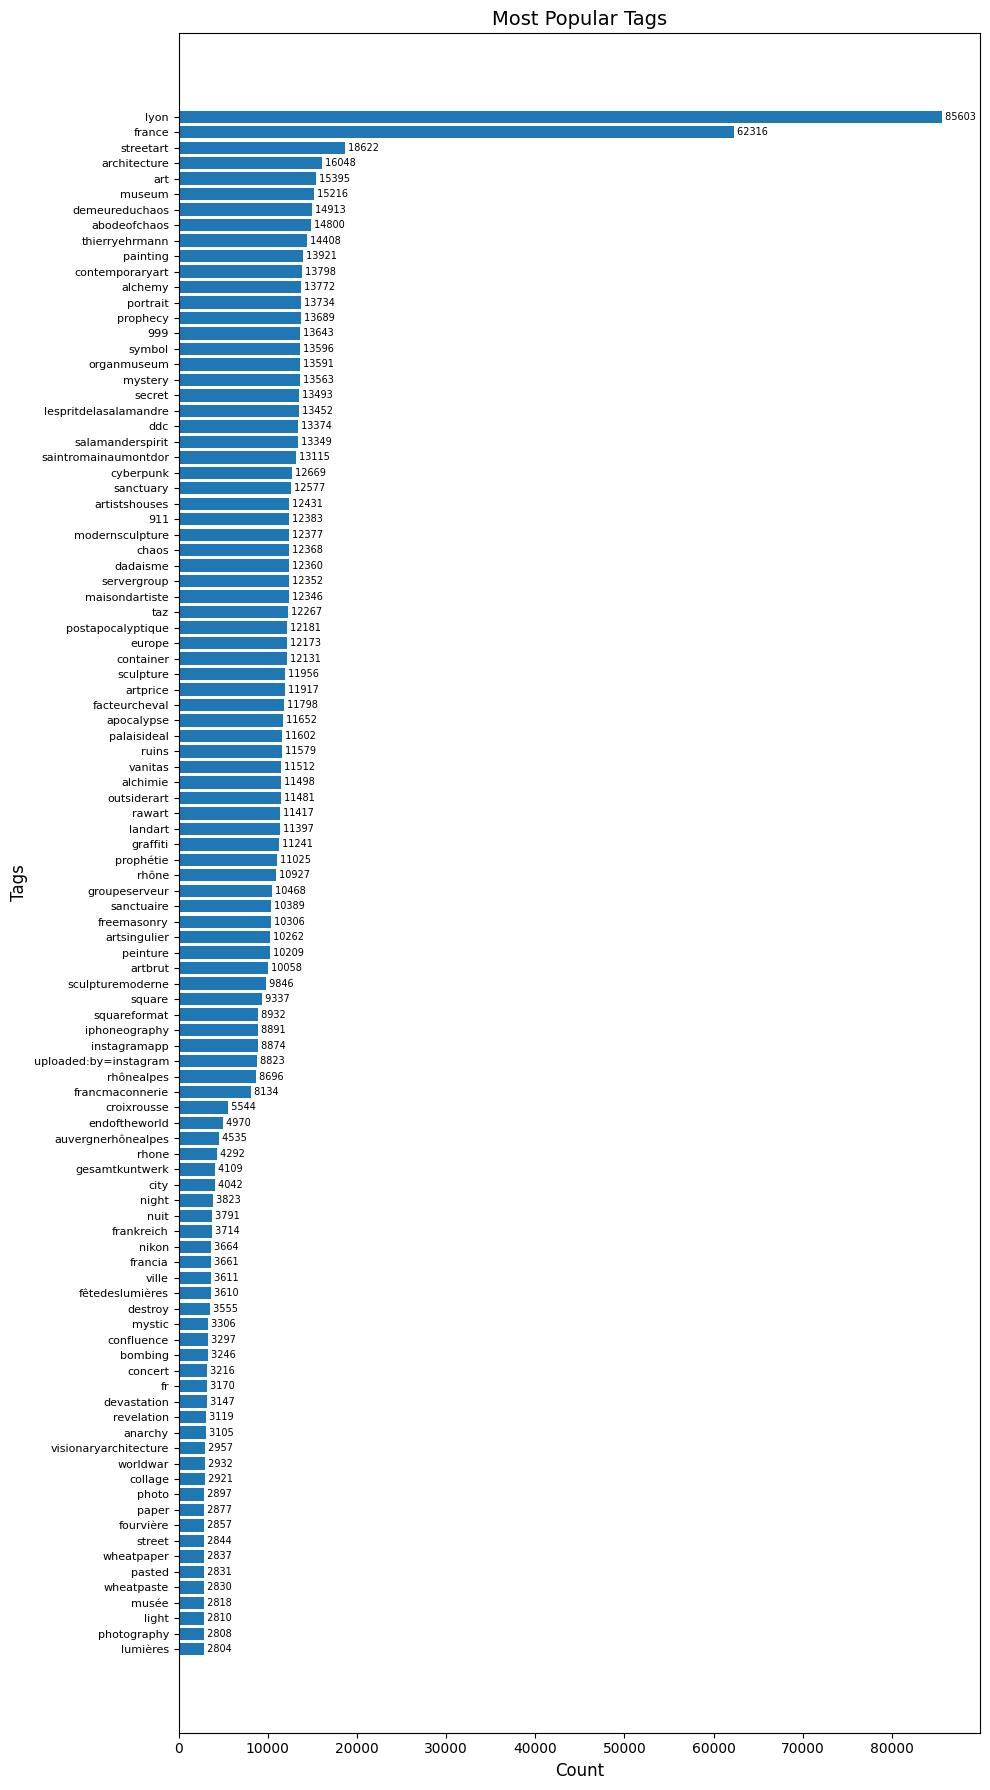

In [9]:
all_tags = []
for tags_list in df["tags"]:
    if tags_list and isinstance(tags_list, list):
        all_tags.extend(tags_list)

tag_counts = Counter(all_tags)
print(f"Total unique tags: {len(tag_counts)}")
print(f"Total tags: {len(all_tags)}\n")

top_tags = tag_counts.most_common(100)
tags, counts = zip(*top_tags)

fig, ax = plt.subplots(figsize=(10, 18))
ax.barh(range(len(tags)), counts)
ax.set_yticks(range(len(tags)))
ax.set_yticklabels(tags, fontsize=8)
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Tags", fontsize=12)
ax.set_title("Most Popular Tags", fontsize=14)
ax.invert_yaxis()  # Most popular at the top

for i, count in enumerate(counts):
    ax.text(count, i, f" {count}", va='center', fontsize=7)

plt.tight_layout()
plt.show()

Total unique tags after filtering: 44510
Total tags after filtering: 1747073



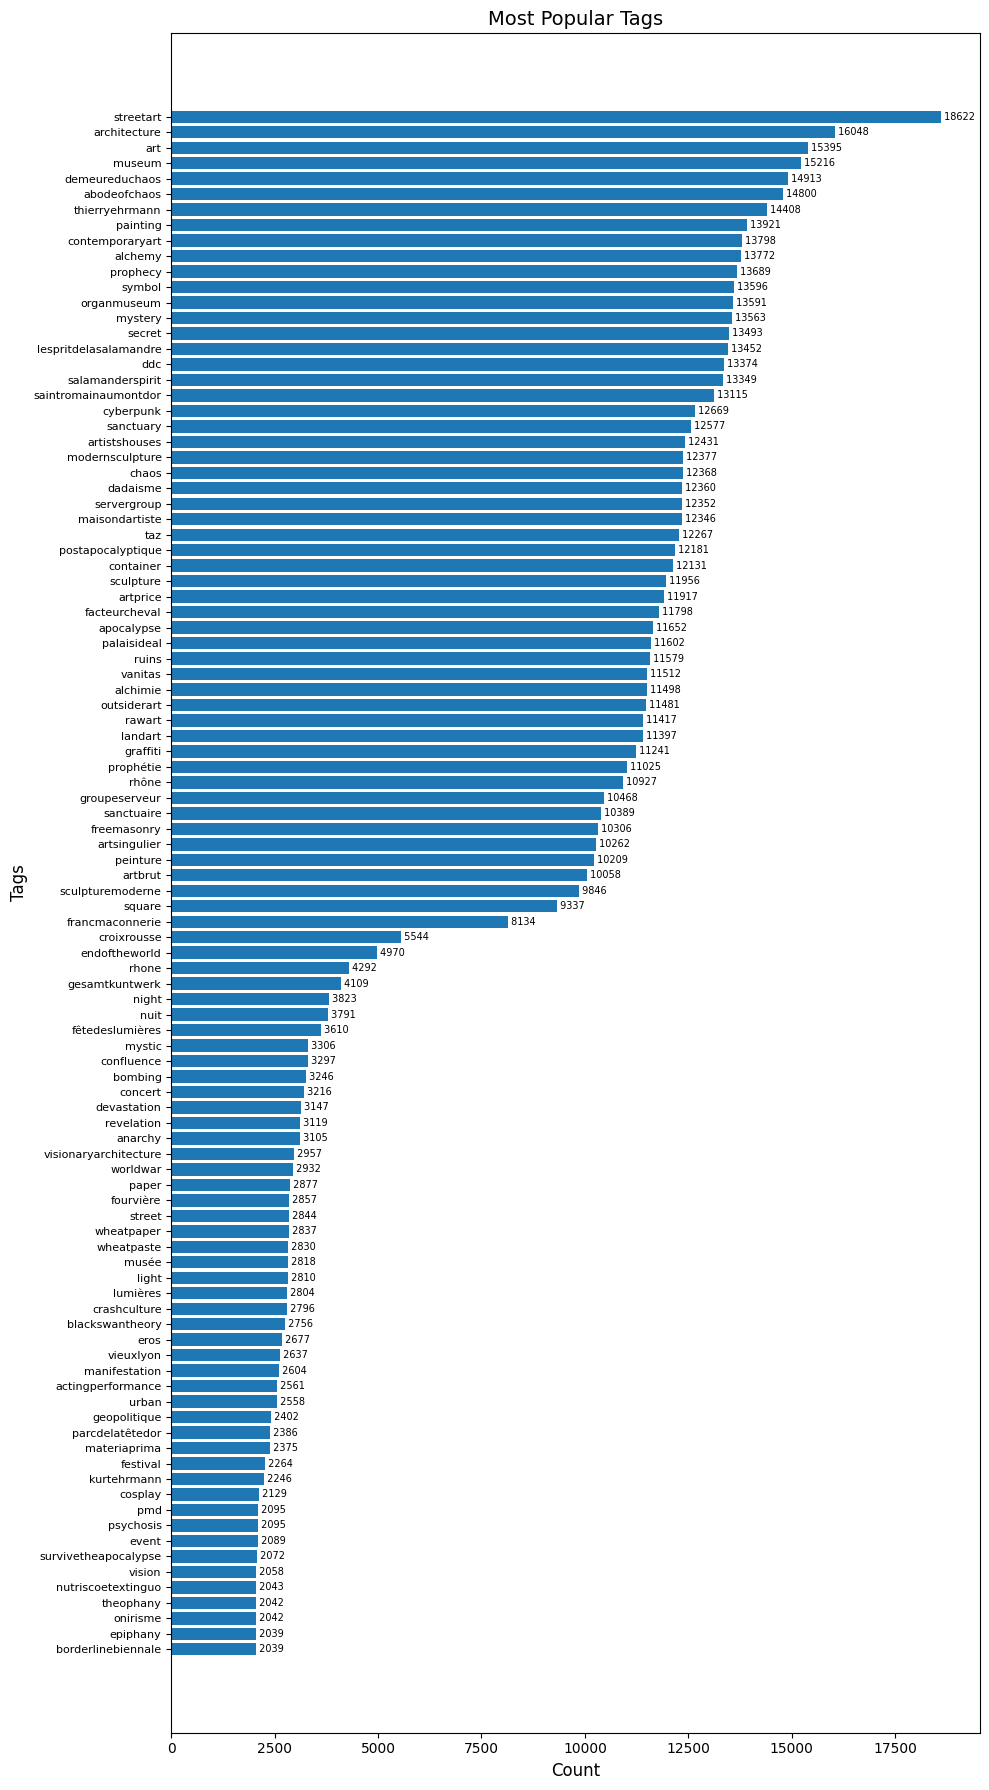

In [10]:
tags_to_delete = set(
    [
        "lyon",
        "france",
        "flickr",
        "photography",
        "photo",
        "travel",
        "city",
        "trip",
        "vacation",
        "tourism",
        "europe",
        "clouds",
        "people",
        "selfie",
        "portrait",
        "family",
        "friends",
        "fr",
        "destroy",
        "nikon",
        "canon",
        "uploaded:by=instagram",
        "ville",
        "francia",
        "collage",
        "999",
        "911",
        "frankreich",
        "auvergnerhônealpes",
        "rhônealpes",
        "instagramapp",
        "instagram",
        "lione",
        "69",
        "villeurbanne",
        "pasted",
        "live",
        "iphoneography",
        "2019",
        "2018",
        "2017",
        "2016",
        "2015",
        "2014",
        "2013",
        "2012",
        "2011",
        "2010",
        "2009",
        "2008",
        "2007",
        "2006",
        "2005",
        "2004",
        "frankrijk",
        "pasteup",
        "rhonealpes",
        "squareformat",
        "madeinfrance",

    ]
)

all_tags_filtered = [tag for tag in all_tags if tag not in tags_to_delete]
tag_counts_filtered = Counter(all_tags_filtered)
print(f"Total unique tags after filtering: {len(tag_counts_filtered)}")
print(f"Total tags after filtering: {len(all_tags_filtered)}\n")

top_tags_filtered = tag_counts_filtered.most_common(100)
tags, counts = zip(*top_tags_filtered)

fig, ax = plt.subplots(figsize=(10, 18))
ax.barh(range(len(tags)), counts)
ax.set_yticks(range(len(tags)))
ax.set_yticklabels(tags, fontsize=8)
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Tags", fontsize=12)
ax.set_title("Most Popular Tags", fontsize=14)
ax.invert_yaxis()  # Most popular at the top

for i, count in enumerate(counts):
    ax.text(count, i, f" {count}", va="center", fontsize=7)

plt.tight_layout()
plt.show()

In [ ]:
# save redundant tags to csv
with open("data/tags_to_delete.txt", "w") as f:
    f.write("\n".join(sorted(tags_to_delete)))
print("Tags to delete saved to data/tags_to_delete.txt")

# Save df to pickle
df.to_pickle("data/flickr_data_with_features.pkl")
print("DataFrame saved to data/flickr_data_with_features.pkl")

Tags to delete saved to data/tags_to_delete.csv
DataFrame saved to data/flickr_data_with_features.pkl
